### Задача 1.

Работаем с датасетом Titanic. Вам даны обучающая и тестовая выборки. Сейчас ваша задача &mdash; на основе анализа предоставленных данных получить некоторое приближенное правило определения, выжил пассажир или нет.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`. Выведите первые 5 строк датасета с заголовками. Охарактеризуйте объем обучающей и тестовой выборки.

Для обучающей выборки опишите каждый столбец датасета: смысл каждого признака, тип переменной (качественная/количественная), какие признаки встречаются и что они означают.

*справочно: Pclass - это класс билета, SibSp - количество братьев/сестер или супругов, которые путешествовали вместе с пассажиром, Parch - количество родителей детей.                            

In [88]:
import pandas as pd
import numpy as np

**Тестовая выборка**

In [90]:
data_test = pd.read_csv('test.csv', sep=',')
data_test.head(5)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


**Обучающая выборка**

- PassengerId - id пассажира, количественная, int64;
- Survived - выжил пассажир или нет, качественная, int64;
- Pclass - класс пассажира, качественная, int64;
- Name - имя пассажира, качественная, object;
- Sex - пол, качественная, object;
- Age - возраст, количественная, float64;
- SibSp - количество братьев/сестер или супругов, количественная, int64;
- Parch - количество родителей/детей, количественная, int64;
- Ticket - номер билета, количественная, object;
- Fare - стоимость билета, количественная, float64;
- Cabin - номер каюты, качественная, object;
- Embarked - порт посадки, качественная, object;

In [92]:
data_train = pd.read_csv('train.csv', sep=',')
data_train.head(5)
# data_train.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Опишите целевой признак и признаки с которыми будете работать. Опишите зависимости для кажого признака и ответа. Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой.

**Целевой признак** - Survived - выжил человек или нет

**Признаки и зависимости:**
- Pclass - класс пассажиров; чем лучше класс, тем больше выживших в этом классе
- Sex - пол; мужчин меньше выжило, чем женщин, т.к. сначала спасают детей, стариков и женщин
- Age - возраст; чем больше возраст человека, тем меньше вероятность того, что он выживет
- SibSp — количество братьев/сестер/супругов; чем больше количество братьев/сестер/супругов - тем больше будут спасать своих близких
- Parch — количество родителей/детей; чем больше количество родителей/детей - тем меньше людей спасутся
- Embarked — порт посадки; чем меньше люди проехали на титанике, тем меньше ориентируются по кораблю

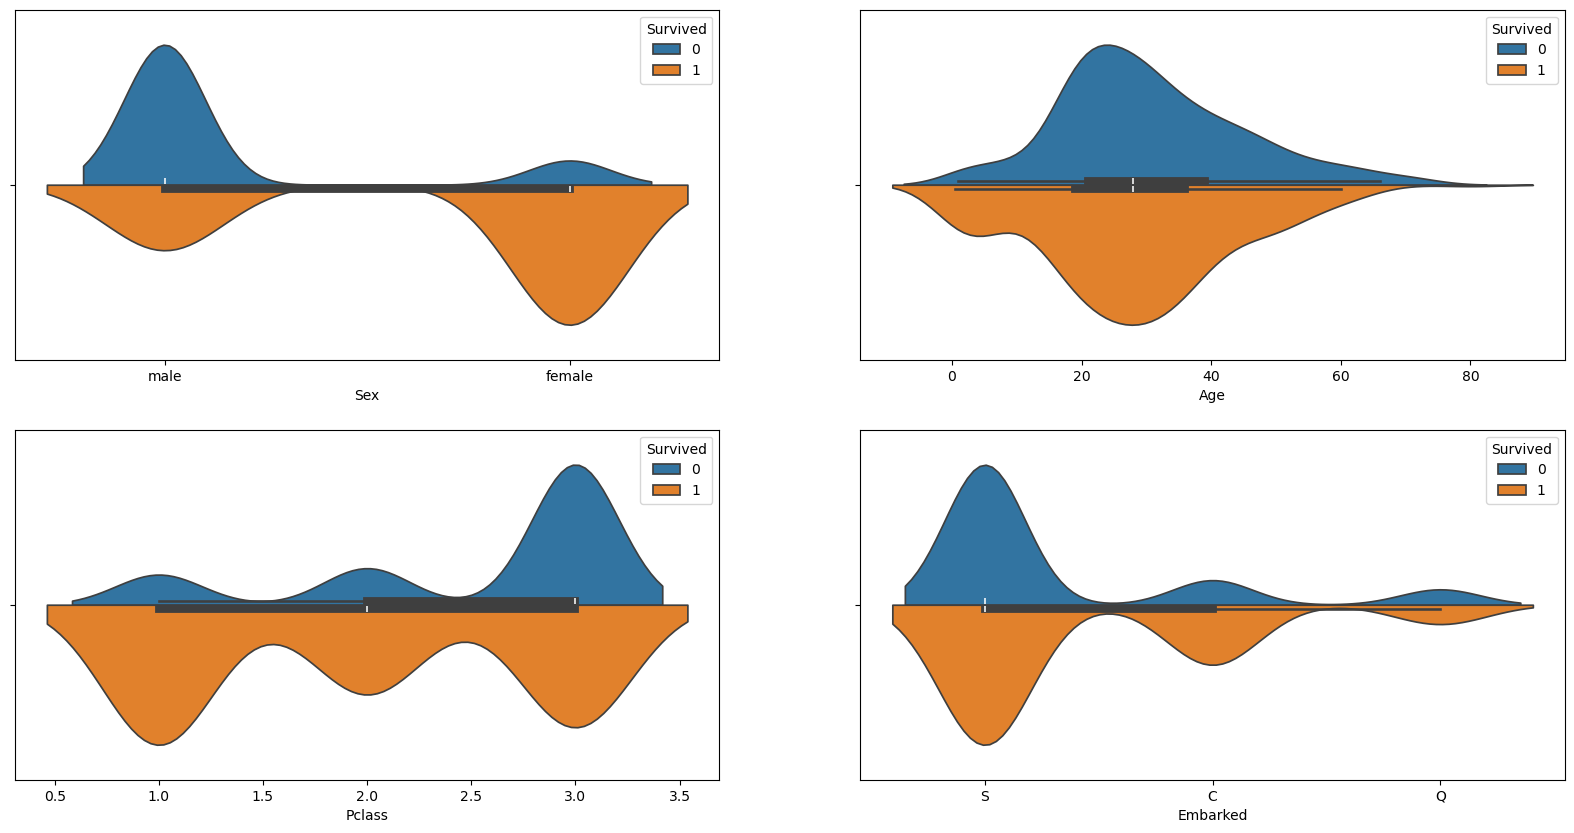

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(221)
sns.violinplot(x="Sex",hue = 'Survived', split = True, data=data_train)
ax2 = fig.add_subplot(222) 
sns.violinplot(x="Age",hue = 'Survived', split = True, data=data_train)
ax3 = fig.add_subplot(223) 
sns.violinplot(x="Pclass",hue = 'Survived', split = True, data=data_train)
ax4 = fig.add_subplot(224) 
sns.violinplot(x="Embarked",hue = 'Survived', split = True, data=data_train)

plt.show()

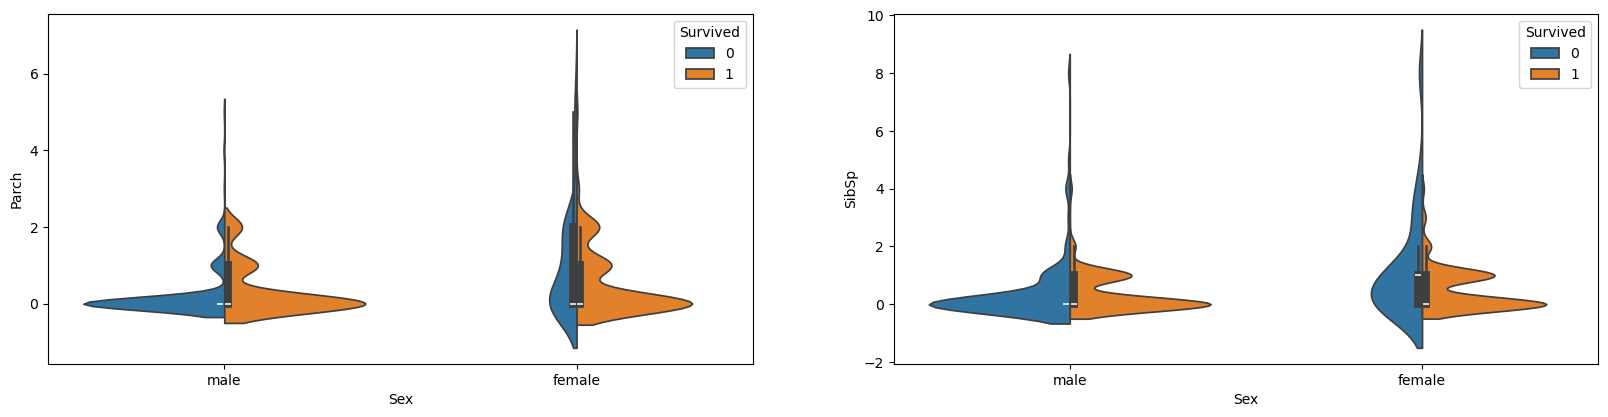

In [96]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(221)
sns.violinplot(x= "Sex", y="Parch",hue = 'Survived', split = True, data=data_train)
ax2 = fig.add_subplot(222)
sns.violinplot(x= "Sex", y="SibSp",hue = 'Survived', split = True, data=data_train)
plt.show()

#### 2. Выделение признаков

Обработайте пропуски и дубликаты. Приведите категориальные признаки к числовому виду. Количественные признаки разделите на группы. Выбирите признаки для тренировки классификатора. Создайте новые признаки, основываясь на существующих.

1. Обработка пропусков (NaN)

In [100]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [101]:
print(data_train.isnull().sum())
print(data_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [102]:
print(f"среднее значение age: {data_train['Age'].mean()}")
print(f"среднее значение age: {data_test['Age'].mean()}")
data_train.fillna({'Age':data_train['Age'].mean()}, inplace=True)
data_test.fillna({'Age':data_test['Age'].mean()}, inplace=True)
data_train.head(10)

среднее значение age: 29.69911764705882
среднее значение age: 30.272590361445783


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [103]:
print(f"среднее значение age: {data_test['Fare'].mean()}")
data_test.fillna({'Fare':data_test['Fare'].mean()}, inplace=True)

среднее значение age: 35.627188489208635


In [104]:
print(data_test['Cabin'].unique())

# Заменяем любую строку, содержащую 'C23', 'C25', 'C27' на 'C25'
data_train['Cabin'] = data_train['Cabin'].str.replace(r'C23 C25 C27', 'C25', regex=True)
data_train['Cabin'] = data_train['Cabin'].str.replace(r'B96 B98', 'B96', regex=True)
data_train['Cabin'] = data_train['Cabin'].str.replace(r'F  ', '', regex=True)

data_test['Cabin'] = data_test['Cabin'].str.replace(r'B58 B60', 'B60', regex=True)
data_test['Cabin'] = data_test['Cabin'].str.replace(r'B57 B59 B63 B66', 'B59', regex=True)
data_test['Cabin'] = data_train['Cabin'].str.replace(r'F  ', '', regex=True)

data_test.head(10)

[nan 'B45' 'E31' 'B57 B59 B63 B66' 'B36' 'A21' 'C78' 'D34' 'D19' 'A9'
 'D15' 'C31' 'C23 C25 C27' 'F G63' 'B61' 'C53' 'D43' 'C130' 'C132' 'C101'
 'C55 C57' 'B71' 'C46' 'C116' 'F' 'A29' 'G6' 'C6' 'C28' 'C51' 'E46' 'C54'
 'C97' 'D22' 'B10' 'F4' 'E45' 'E52' 'D30' 'B58 B60' 'E34' 'C62 C64' 'A11'
 'B11' 'C80' 'F33' 'C85' 'D37' 'C86' 'D21' 'C89' 'F E46' 'A34' 'D' 'B26'
 'C22 C26' 'B69' 'C32' 'B78' 'F E57' 'F2' 'A18' 'C106' 'B51 B53 B55'
 'D10 D12' 'E60' 'E50' 'E39 E41' 'B52 B54 B56' 'C39' 'B24' 'D28' 'B41'
 'C7' 'D40' 'D38' 'C105']


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,C85,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,C123,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,E46,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [105]:
print("TRAIN:")
print(data_train['Cabin'].value_counts(dropna=False))
print("")
print("TEST:")
print(data_test['Cabin'].value_counts(dropna=False))

data_train.fillna({'Cabin':data_train['Cabin'].value_counts().index[2]}, inplace=True)
data_test.fillna({'Cabin':data_test['Cabin'].value_counts().index[2]}, inplace=True)


TRAIN:
Cabin
NaN        687
C25          4
G6           4
B96          4
C22 C26      3
          ... 
E34          1
C7           1
C54          1
E36          1
C148         1
Name: count, Length: 148, dtype: int64

TEST:
Cabin
NaN    326
G6       4
C25      3
F2       3
C78      2
      ... 
B80      1
C85      1
D15      1
C93      1
B96      1
Name: count, Length: 74, dtype: int64


In [106]:
print("TRAIN:")
print(data_train['Embarked'].value_counts(dropna=False))
print("")
print("TEST:")
print(data_test['Embarked'].value_counts(dropna=False))

data_train.fillna({'Embarked':data_train['Embarked'].value_counts().index[0]}, inplace=True)

TRAIN:
Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

TEST:
Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


2. Обработка дубликатов

In [108]:
data_train = data_train.drop_duplicates()
data_test = data_test.drop_duplicates()

3. Преобразование категориальных признаков в числовые

In [110]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C25,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C25,S


In [111]:
data_train['Sex'] = data_train['Sex'].replace({'male': 0, 'female': 1}).astype(int)
data_test['Sex'] = data_test['Sex'].replace({'male': 0, 'female': 1}).astype(int)
data_train.head()

C:\Users\ElenaKosteva\AppData\Local\Temp\ipykernel_15780\1034323694.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train['Sex'] = data_train['Sex'].replace({'male': 0, 'female': 1}).astype(int)
C:\Users\ElenaKosteva\AppData\Local\Temp\ipykernel_15780\1034323694.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test['Sex'] = data_test['Sex'].replace({'male': 0, 'female': 1}).astype(int)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,C25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,C25,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,C25,S


In [112]:
data_train['Embarked'] = data_train['Embarked'].replace({'C': 0, 'S': 1, 'Q': 2}).astype(int)
data_test['Embarked'] = data_test['Embarked'].replace({'C': 0, 'S': 1, 'Q': 2}).astype(int)

print(data_train['Embarked'].unique())
data_train.head()

[1 0 2]


C:\Users\ElenaKosteva\AppData\Local\Temp\ipykernel_15780\2043569263.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train['Embarked'] = data_train['Embarked'].replace({'C': 0, 'S': 1, 'Q': 2}).astype(int)
C:\Users\ElenaKosteva\AppData\Local\Temp\ipykernel_15780\2043569263.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test['Embarked'] = data_test['Embarked'].replace({'C': 0, 'S': 1, 'Q': 2}).astype(int)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,C25,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,C25,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,C25,1


4. Разделение количественных признаков на группы

In [114]:
print(data_train['Age'].unique())

[22.         38.         26.         35.         29.69911765 54.
  2.         27.         14.          4.         58.         20.
 39.         55.         31.         34.         15.         28.
  8.         19.         40.         66.         42.         21.
 18.          3.          7.         49.         29.         65.
 28.5         5.         11.         45.         17.         32.
 16.         25.          0.83       30.         33.         23.
 24.         46.         59.         71.         37.         47.
 14.5        70.5        32.5        12.          9.         36.5
 51.         55.5        40.5        44.          1.         61.
 56.         50.         36.         45.5        20.5        62.
 41.         52.         63.         23.5         0.92       43.
 60.         10.         64.         13.         48.          0.75
 53.         57.         80.         70.         24.5         6.
  0.67       30.5         0.42       34.5        74.        ]


In [115]:
data_train['Age_group'] = pd.cut(data_train['Age'], bins=[0, 18, 30, 50, 100], labels=['child', 'young_man', 'adult', 'senior'])
data_test['Age_group'] = pd.cut(data_test['Age'], bins=[0, 18, 30, 50, 100], labels=['child', 'young_man', 'adult', 'senior'])
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,C25,1,young_man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,adult
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,C25,1,young_man
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,adult
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,C25,1,adult


In [116]:
print(data_train['Fare'].unique())

[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      15.05    39.      22.025   50.       8.4042   6.4958  10.4625
  1

In [117]:
print(f"среднее значение age: {data_train['Fare'].min()}")
print(f"среднее значение age: {data_test['Fare'].min()}")

среднее значение age: 0.0
среднее значение age: 0.0


In [118]:
data_train['Fare_group'] = pd.cut(data_train['Fare'], bins=[-1, 30, 60, 150, 300, 600], labels=['cheap', 'average', 'more_average', 'expensive', 'vip'])
data_test['Fare_group'] = pd.cut(data_test['Fare'], bins=[-1, 30, 60, 150, 300, 600], labels=['cheap', 'average', 'more_average', 'expensive', 'vip'])
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Fare_group
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,C25,1,young_man,cheap
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,adult,more_average
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,C25,1,young_man,cheap
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,adult,average
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,C25,1,adult,cheap


5. Выбор признаков для тренировки классификатора

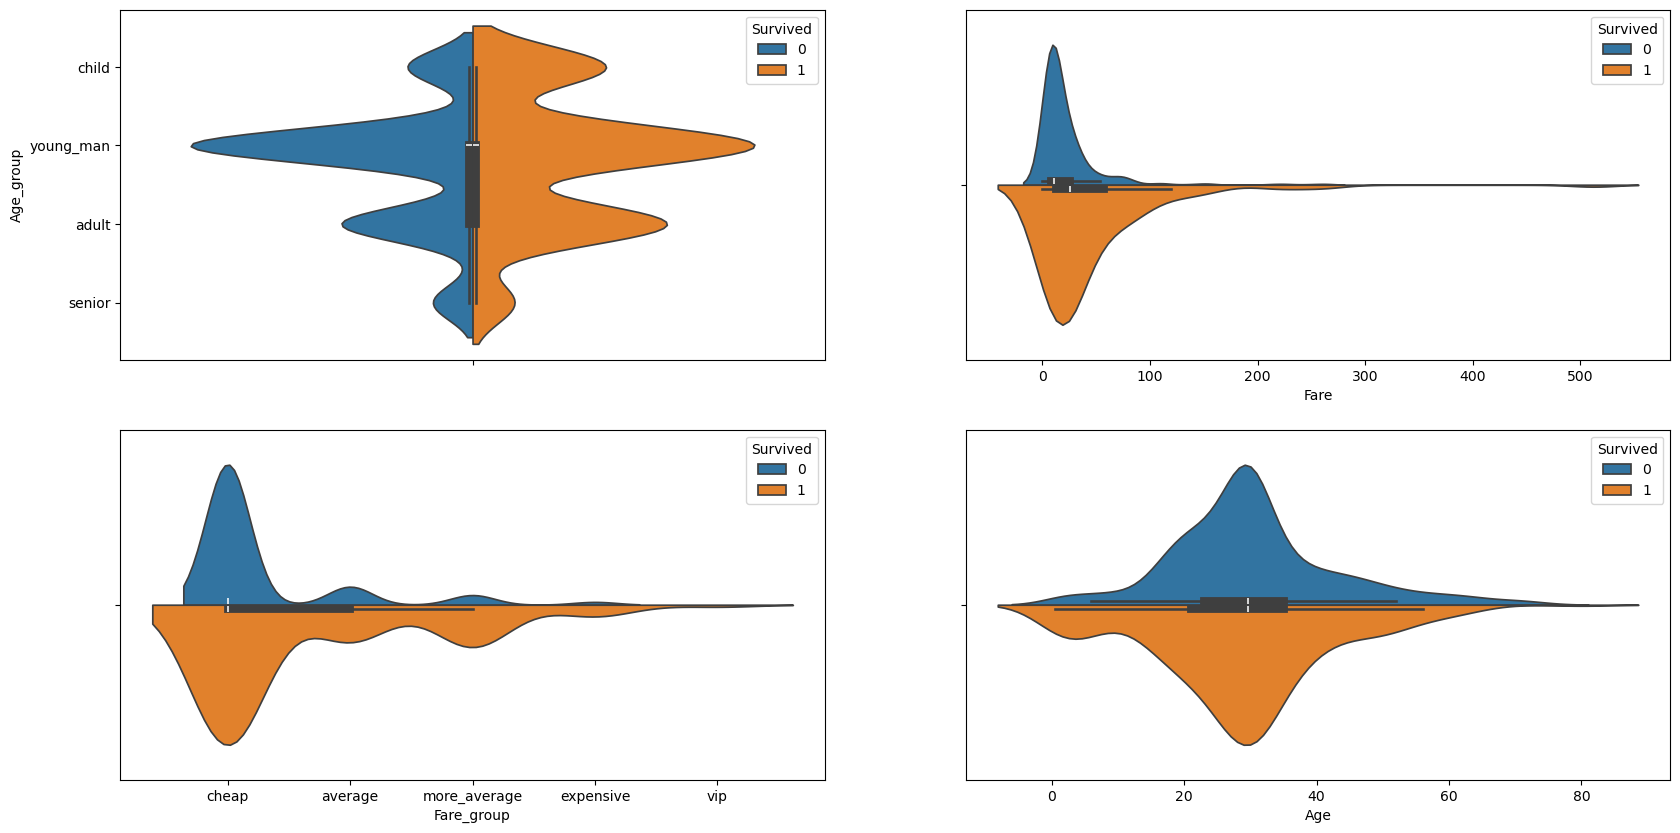

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(221)
sns.violinplot(y = 'Age_group', hue = 'Survived', split = True, data=data_train)
ax2 = fig.add_subplot(222) 
sns.violinplot(x="Fare",hue = 'Survived', split = True, data=data_train)
ax3 = fig.add_subplot(223) 
sns.violinplot(x="Fare_group",hue = 'Survived', split = True, data=data_train)
ax4 = fig.add_subplot(224) 
sns.violinplot(x="Age",hue = 'Survived', split = True, data=data_train)

plt.show()

In [121]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int32   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    int32   
 12  Age_group    891 non-null    category
 13  Fare_group   891 non-null    category
dtypes: category(2), float64(2), int32(2), int64(5), object(3)
memory usage: 78.8+ KB


In [122]:
print(data_train['Sex'].corr(data_train['Survived']))
print(data_train['Age'].corr(data_train['Survived']))
print(data_train['Pclass'].corr(data_train['Survived']))
print(data_train['SibSp'].corr(data_train['Survived']))
print(data_train['Parch'].corr(data_train['Survived']))
print(data_train['Embarked'].corr(data_train['Survived']))
print(data_train['Fare'].corr(data_train['Survived']))

# SibSp, Age, Parch показывают корреляцию ближе к 0
# Вместо Age возьмем Age_group

0.5433513806577552
-0.06980851528714316
-0.33848103596101503
-0.035322498885735666
0.08162940708348382
-0.12595276550243223
0.25730652238496243


In [123]:
data_train.info()
# Исключеним неинформативные признаки: PassengerId, Name, Ticket, Cabin, остальные пока оставим

features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_group', 'Fare']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int32   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    int32   
 12  Age_group    891 non-null    category
 13  Fare_group   891 non-null    category
dtypes: category(2), float64(2), int32(2), int64(5), object(3)
memory usage: 78.8+ KB


6. Создание новых признаков на основе существующих

In [125]:
# сделаем новый признак - размер семьи, т.к. в отдельности он не показывают полную картину
data_train['Family_size'] = data_train['SibSp'] + data_train['Parch']
data_test['Family_size'] = data_test['SibSp'] + data_test['Parch']
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Fare_group,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,C25,1,young_man,cheap,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,adult,more_average,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,C25,1,young_man,cheap,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,adult,average,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,C25,1,adult,cheap,0


In [126]:
# Извлекаем первую букву из 'Cabin', где есть значения
data_train['Cabin_l'] = data_train['Cabin'].str[0]
data_test['Cabin_l'] = data_train['Cabin'].str[0]
data_test.head()
print(data_test['Cabin_l'].unique())
print(data_train['Cabin_l'].value_counts(dropna=False))

['C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
Cabin_l
C    746
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


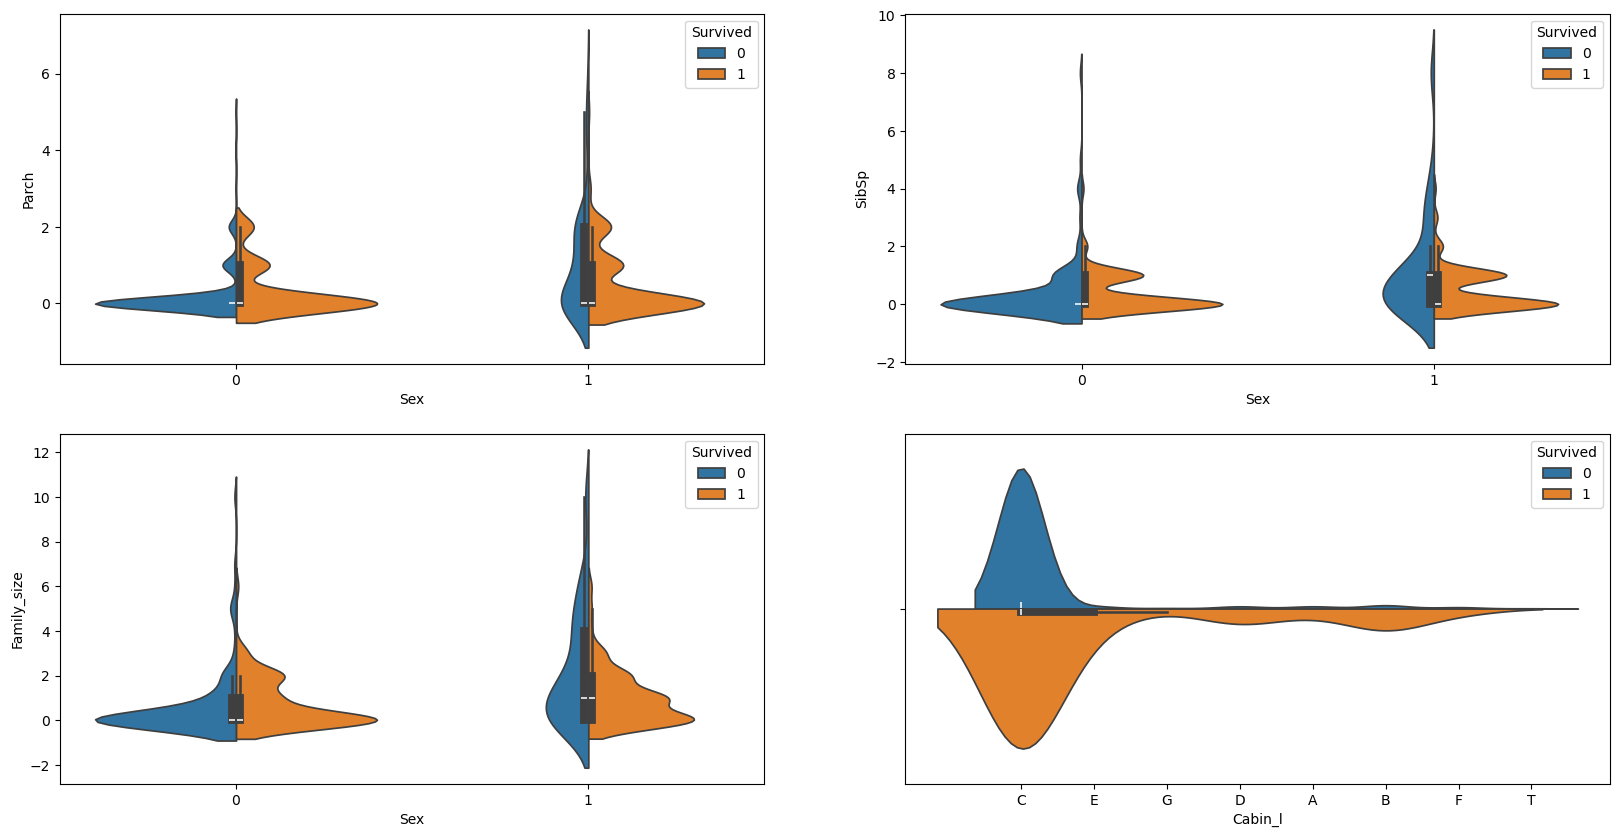

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(221)
sns.violinplot(x= "Sex", y="Parch",hue = 'Survived', split = True, data=data_train)
ax2 = fig.add_subplot(222)
sns.violinplot(x= "Sex", y="SibSp",hue = 'Survived', split = True, data=data_train)
ax3 = fig.add_subplot(223)
sns.violinplot(x = "Sex", y = "Family_size", hue = 'Survived', split = True, data=data_train)
ax4 = fig.add_subplot(224)
sns.violinplot(x= "Cabin_l", hue = 'Survived', split = True, data=data_train)

plt.show()

# Буква кабины не показывает наглядную зависимость, поэтому не будем ее брать

In [128]:
print(data_test['Family_size'].unique())

data_train['Family_size_group'] = pd.cut(data_train['Family_size'], bins=[-1, 0, 3, 6, 11], labels=['alone', 'small', 'big', 'very big'])
data_test['Family_size_group'] = pd.cut(data_test['Family_size'], bins=[-1, 0, 3, 6, 11], labels=['alone', 'small', 'big', 'very big'])
data_train.head()

[ 0  1  2  4  3  5  7  6 10]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Fare_group,Family_size,Cabin_l,Family_size_group
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,C25,1,young_man,cheap,1,C,small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,adult,more_average,1,C,small
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,C25,1,young_man,cheap,0,C,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,adult,average,1,C,small
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,C25,1,adult,cheap,0,C,alone


<Axes: xlabel='Family_size_group'>

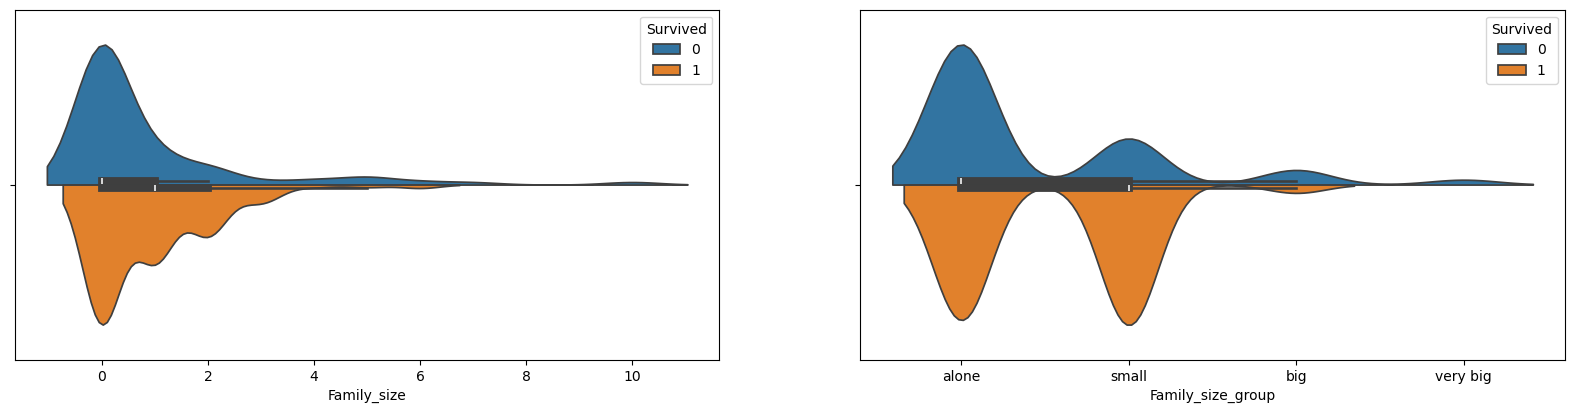

In [129]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(221)
sns.violinplot( x="Family_size",hue = 'Survived', split = True, data=data_train)
ax2 = fig.add_subplot(222)
sns.violinplot(x="Family_size_group",hue = 'Survived', split = True, data=data_train)

In [130]:
print(data_train['Family_size'].corr(data_train['Survived']))
# Family_size_group лучше для модели, чем Family_size и Parch и SibSp, т.к. коэффицент корреляции все еще близок к 0

0.016638989282745174


In [131]:
data_train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Fare_group,Family_size,Cabin_l,Family_size_group
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,C25,1,young_man,cheap,1,C,small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,adult,more_average,1,C,small
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,C25,1,young_man,cheap,0,C,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,adult,average,1,C,small


In [132]:
# Применение One-Hot Encoding
data_train = pd.get_dummies(data_train, columns=['Family_size_group'], drop_first=True)
data_test = pd.get_dummies(data_test, columns=['Family_size_group'], drop_first=True)
data_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Fare_group,Family_size,Cabin_l,Family_size_group_small,Family_size_group_big,Family_size_group_very big
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,C25,1,young_man,cheap,1,C,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,adult,more_average,1,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,C25,1,young_man,cheap,0,C,False,False,False


In [133]:
data_train = pd.get_dummies(data_train, columns=['Age_group'], drop_first=True)
data_test = pd.get_dummies(data_test, columns=['Age_group'], drop_first=True)
data_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Fare_group,Family_size,Cabin_l,Family_size_group_small,Family_size_group_big,Family_size_group_very big,Age_group_young_man,Age_group_adult,Age_group_senior
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,1,cheap,1,C,True,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,0,more_average,1,C,True,False,False,False,True,False


In [134]:
data_train['Age_group_young_man'] = data_train['Age_group_young_man'].replace({'False': 0, 'True': 1}).astype(int)
data_train['Age_group_adult'] = data_train['Age_group_adult'].replace({'False': 0, 'True': 1}).astype(int)
data_train['Age_group_senior'] = data_train['Age_group_senior'].replace({'False': 0, 'True': 1}).astype(int)

data_train['Family_size_group_small'] = data_train['Family_size_group_small'].replace({'False': 0, 'True': 1}).astype(int)
data_train['Family_size_group_big'] = data_train['Family_size_group_big'].replace({'False': 0, 'True': 1}).astype(int)
data_train['Family_size_group_very big'] = data_train['Family_size_group_very big'].replace({'False': 0, 'True': 1}).astype(int)

data_test['Age_group_young_man'] = data_test['Age_group_young_man'].replace({'False': 0, 'True': 1}).astype(int)
data_test['Age_group_adult'] = data_test['Age_group_adult'].replace({'False': 0, 'True': 1}).astype(int)
data_test['Age_group_senior'] = data_test['Age_group_senior'].replace({'False': 0, 'True': 1}).astype(int)

data_test['Family_size_group_small'] = data_test['Family_size_group_small'].replace({'False': 0, 'True': 1}).astype(int)
data_test['Family_size_group_big'] = data_test['Family_size_group_big'].replace({'False': 0, 'True': 1}).astype(int)
data_test['Family_size_group_very big'] = data_test['Family_size_group_very big'].replace({'False': 0, 'True': 1}).astype(int)

In [135]:
data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Fare_group,Family_size,Cabin_l,Family_size_group_small,Family_size_group_big,Family_size_group_very big,Age_group_young_man,Age_group_adult,Age_group_senior
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,1,cheap,1,C,1,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,0,more_average,1,C,1,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,...,1,cheap,0,C,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,...,1,average,1,C,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,...,1,cheap,0,C,0,0,0,0,1,0


In [136]:
# Итоговая выборка показателей
features = ['Pclass', 'Sex', 'Family_size_group', 'Embarked', 'Age_group', 'Fare']
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   PassengerId                 891 non-null    int64   
 1   Survived                    891 non-null    int64   
 2   Pclass                      891 non-null    int64   
 3   Name                        891 non-null    object  
 4   Sex                         891 non-null    int32   
 5   Age                         891 non-null    float64 
 6   SibSp                       891 non-null    int64   
 7   Parch                       891 non-null    int64   
 8   Ticket                      891 non-null    object  
 9   Fare                        891 non-null    float64 
 10  Cabin                       891 non-null    object  
 11  Embarked                    891 non-null    int32   
 12  Fare_group                  891 non-null    category
 13  Family_size         

Данная задача относится к классу задач по классификации данных, т.к. цель предсказания - определить 0 или 1 в зависимости от того, удастся ли спастись пассажиру или нет. Таким образом имеем задачу бинарной классификации, когда выбор делается из 2 возможных исходов и необходимо отнести запись в тестовом наборе к одному из двух классов - 0 или 1.

Определите тренировочный и тестовые наборы. Обычно семантика переменных следующая, посколько результат вычисления - это (одна) величина, то на выходе алгоритма мы получим вектор ответов y, определяемый по набору передаваемых признаков (это уже матрица) - X. Т.о. y = F(X), такая запись справедлива для любых алгоритмов/моделей. Соответственно вводим переменные (новые, полученный копированием данных из существующих загруженных датасетов train и test - их мы не трогаем):

X_train - признаки (те, которые мы решили использовать для обучения) из оригинанльного тренировочного набора  
y_train - ответы из оригинального тренировочного набора, соответсвующие признакам X_train  
X_test - признаки из тестового набора (это новые записи, которые мы НЕ используем в процессе обучения)  
y_test - его еще нет, нам как раз и надо его найти

Размерности и структура X_train и X_test должны совпадать, т.к. после проведенного обучения алгоритм F(X) должен оперировать данными одинакового вида.

In [138]:
# Список признаков, которые будем использовать для обучения
features = ['Pclass', 'Sex','Embarked', 'Family_size_group_small', 'Family_size_group_big', 
            'Family_size_group_very big', 'Age_group_young_man', 'Age_group_adult', 'Age_group_senior', 'Fare']

# X_train - признаки тренировочного набора
X_train = data_train[features]
X_train.to_csv("X_train.csv", index=False)

# Y_train - целевая переменная (Survived)
Y_train = data_train['Survived']
Y_train.to_csv("Y_train.csv", index=False)

# X_test - признаки тестового набора (аналогичные тренировочным)
X_test = data_test[features]
X_test.to_csv("X_test.csv", index=False)
X_train.info()

Y_test = pd.read_csv('test_survived.csv', sep=',')
Y_test = Y_test['Survived']
Y_test.to_csv("Y_test.csv", index=False)
Y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pclass                      891 non-null    int64  
 1   Sex                         891 non-null    int32  
 2   Embarked                    891 non-null    int32  
 3   Family_size_group_small     891 non-null    int32  
 4   Family_size_group_big       891 non-null    int32  
 5   Family_size_group_very big  891 non-null    int32  
 6   Age_group_young_man         891 non-null    int32  
 7   Age_group_adult             891 non-null    int32  
 8   Age_group_senior            891 non-null    int32  
 9   Fare                        891 non-null    float64
dtypes: float64(1), int32(8), int64(1)
memory usage: 41.9 KB
<class 'pandas.core.series.Series'>
RangeIndex: 418 entries, 0 to 417
Series name: Survived
Non-Null Count  Dtype
--------------  -----
418 non-null  

In [139]:
X_train.shape, Y_train.shape

((891, 10), (891,))

In [140]:
X_test.shape, Y_test.shape

((418, 10), (418,))

Процедура тренировки и проверки выглядит следующим образом:

Во-первых, тренируем классификаторы на базе тренировочного набора.  
После этого, используя натренированный классификатор, даем прогноз значения по тестовым данным.  
В конце, рассчитываем метрики точности натренированного классификатора.

## 3. Классификация

Существует большое количество алгоритмов классификации, используйте минимум три для вашего набора данных.

Для классификации с целевым признаком Survived, давайте применим три популярных алгоритма классификации: 
1. Random Forest — случайный лес, ансамблевый метод, хорошо подходит для работы с разнородными данными.
2. Gradient Boosting — метод градиентного бустинга, который улучшает прогнозы путем последовательного уменьшения ошибки.
3. Nearest Neighbors (K-Nearest Neighbors, KNN) — алгоритм ближайших соседей, который предсказывает класс на основе ближайших соседей в пространстве признаков.

In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

**K-Nearest Neighbors**

In [146]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, Y_train)
Y_knn = knn_classifier.predict(X_test)


**Gradient Boosting**

In [148]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, Y_train)
Y_gb = gb_classifier.predict(X_test)

**Random Forest**

In [150]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, Y_train)
Y_rf = rf_classifier.predict(X_test)

#### 4. Качество

У нас имеется тестовая часть выборки. Оцените качество полученных моделей

In [152]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

**K-Nearest Neighbors**

accuracy: 0.7560
sensitivity: 0.6776
specificity: 0.8008
one_minus_specificity: 0.1992
precision: 0.6603
f1_score: 0.6688


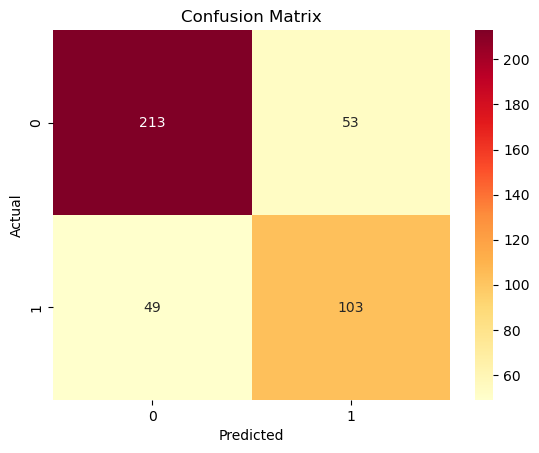

In [154]:
mat = confusion_matrix(Y_test, Y_knn)

TN, FP, FN, TP = mat.ravel()
accuracy = (TP + TN) / (TN + FP + FN + TP)
sensitivity = TP / (TP + FN) #сколько верно спрогнозировано 
# выживших по сравнению еще с теми, кого ошибочно посчитали утоновшими
specificity = TN / (TN + FP)  #сколько верно спрогнозировано 
# невыживших по сравнению еще с теми, кого ошибочно посчитали выжившими
one_minus_specificity = FP / (FP + TN) #сколько ошибочно выживших по сравнению еще с теми,
# кого верно спрогнозировали невыжившими
precision = TP / (TP + FP) # сколько верно спрогнозировано выживших по сравнению еще с теми,
# кого ошибочно посчитали выжившими
f1_score = 2 * (precision * sensitivity / (precision + sensitivity)) 
#это гармоническое среднее между Precision и Sensitivity.

print(f"accuracy: {accuracy:.4f}")
print(f"sensitivity: {sensitivity:.4f}")
print(f"specificity: {specificity:.4f}")
print(f"one_minus_specificity: {one_minus_specificity:.4f}")
print(f"precision: {precision:.4f}")
print(f"f1_score: {f1_score:.4f}")

sns.heatmap(mat, annot=True, fmt='d', cmap='YlOrRd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Gradient Boosting**

accuracy: 0.8684
sensitivity: 0.7434
specificity: 0.9398
one_minus_specificity: 0.0602
precision: 0.8760
f1_score: 0.8043


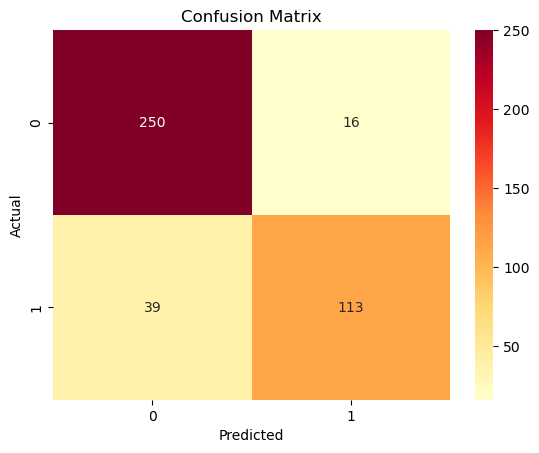

In [156]:
mat = confusion_matrix(Y_test, Y_gb)

TN, FP, FN, TP = mat.ravel()
accuracy = (TP + TN) / (TN + FP + FN + TP)
sensitivity = TP / (TP + FN) #сколько верно спрогнозировано 
# выживших по сравнению еще с теми, кого ошибочно посчитали утоновшими
specificity = TN / (TN + FP)  #сколько верно спрогнозировано 
# невыживших по сравнению еще с теми, кого ошибочно посчитали выжившими
one_minus_specificity = FP / (FP + TN) #сколько ошибочно выживших по сравнению еще с теми,
# кого верно спрогнозировали невыжившими
precision = TP / (TP + FP) # сколько верно спрогнозировано выживших по сравнению еще с теми,
# кого ошибочно посчитали выжившими
f1_score = 2 * (precision * sensitivity / (precision + sensitivity)) 
#это гармоническое среднее между Precision и Sensitivity.

print(f"accuracy: {accuracy:.4f}")
print(f"sensitivity: {sensitivity:.4f}")
print(f"specificity: {specificity:.4f}")
print(f"one_minus_specificity: {one_minus_specificity:.4f}")
print(f"precision: {precision:.4f}")
print(f"f1_score: {f1_score:.4f}")


sns.heatmap(mat, annot=True, fmt='d', cmap='YlOrRd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Random Forest**

accuracy: 0.8182
sensitivity: 0.6974
specificity: 0.8872
one_minus_specificity: 0.1128
precision: 0.7794
f1_score: 0.7361


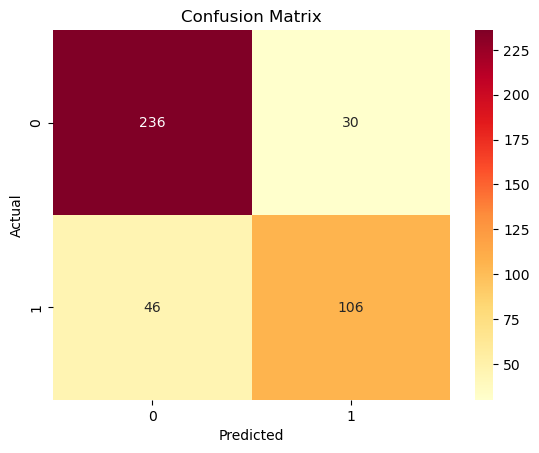

In [158]:
mat = confusion_matrix(Y_test, Y_rf)

TN, FP, FN, TP = mat.ravel()
accuracy = (TP + TN) / (TN + FP + FN + TP)
sensitivity = TP / (TP + FN) #сколько верно спрогнозировано 
# выживших по сравнению еще с теми, кого ошибочно посчитали утоновшими
specificity = TN / (TN + FP)  #сколько верно спрогнозировано 
# невыживших по сравнению еще с теми, кого ошибочно посчитали выжившими
one_minus_specificity = FP / (FP + TN) #сколько ошибочно выживших по сравнению еще с теми,
# кого верно спрогнозировали невыжившими
precision = TP / (TP + FP) # сколько верно спрогнозировано выживших по сравнению еще с теми,
# кого ошибочно посчитали выжившими
f1_score = 2 * (precision * sensitivity / (precision + sensitivity)) 
#это гармоническое среднее между Precision и Sensitivity.

print(f"accuracy: {accuracy:.4f}")
print(f"sensitivity: {sensitivity:.4f}")
print(f"specificity: {specificity:.4f}")
print(f"one_minus_specificity: {one_minus_specificity:.4f}")
print(f"precision: {precision:.4f}")
print(f"f1_score: {f1_score:.4f}")

sns.heatmap(mat, annot=True, fmt='d', cmap='YlOrRd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### 5. Выводы
Опишите метод, который имеет лучшие показатели качества для решения данной задачи.

В задаче титаника нам важны точность, специфичность (минимум количество пассажиров, которых мы ошибочно предсказали как выживших) и чувствительность (минимум количество пассажиров, которых мы ошибочно предсказали как погибших).

1. Модель K-Nearest Neighbors:
- Accuracy: 0.7823
- Sensitivity: 0.7171
- Specificity: 0.8195
- Precision: 0.6943

2. Модель Gradient Boosting:
- Accuracy: 0.8971
- Sensitivity: 0.7829
- Specificity: 0.9624 
- Precision: 0.9225

3. Модель Random Forest:
- Accuracy: 0.8254
- Sensitivity: 0.7237
- Specificity: 0.8835
- Precision: 0.7801

**Итого:** по всем запросам подходит больше всего модель *градиентного бустинга*, так как она имеет самую высокую правильность (89.71%), наилучшую специфичность (96.24%) и хорошую чувствительность (78.29%). Она минимизирует как ложные положительные, так и ложные отрицательные ошибки, что делает её наиболее надежной для предсказания выживших и погибших пассажиров.


**Градиентный бустинг** — это метод ансамблевого обучения, в котором множество слабых моделей (обычно слабых деревьев решений) комбинируются для получения более мощной модели.



**Градиентный бустинг** использует метод градиентного спуска для оптимизации функции потерь. Процесс обучения строится следующим образом:
- Начальная модель: Строится простая модель, которая делает первоначальные предсказания.
- Ошибки: На основе полученных предсказаний вычисляются ошибки (разница между прогнозом и реальными данными).
- Следующая модель: Новая модель учится на этих ошибках, чтобы улучшить качество предсказания.
- Обновление: Постепенно, по мере добавления новых моделей, предсказания становятся все более точными.